In [1]:
#Importing packages we want
import pandas as pd
import numpy as np
import collections
import re

In [2]:
#Reading data
df = pd.read_csv('twitter.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (1,11,16,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,...,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,...,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
2,2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,...,Right,1,RightTroll,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
3,3,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,...,Right,0,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
4,4,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,...,Right,1,RightTroll,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN


In [3]:
# Dropping some columns which may not be significant for our further analysis
df.drop(columns = ['Unnamed: 0', 'external_author_id', 'article_url', 'harvested_date', 'tweet_id'], axis = 1, inplace = True)

In [4]:
df.isnull().sum()

author                    0
content                   1
region                 8818
language                  0
publish_date              0
following                 0
followers                 0
updates                   0
post_type           1648625
account_type              0
retweet                   0
account_category          0
new_june_2018             0
alt_external_id           0
tco1_step1           845971
tco2_step1          2235090
tco3_step1          2931207
dtype: int64

In [5]:
# Since there are too many null values in ['tco2_step1', 'tco3_step1'] columns, we can drop them 
df.drop(columns = ['tco2_step1', 'tco3_step1'], axis = 1, inplace = True)

In [6]:
# Getting the percentage of how many tweets come from the United States
print(df.region.unique())
print(len(df[df['region'] == 'United States']) / len(df))

['Unknown' nan 'United States' 'Italy' 'United Arab Emirates' 'Japan'
 'Israel' 'Azerbaijan' 'Egypt' 'United Kingdom' 'Russian Federation'
 'Turkey' 'Iraq' 'Germany' 'France' 'Ukraine' 'Serbia' 'Hong Kong'
 'Austria' 'Belarus' 'Malaysia' 'Spain' 'Samoa' 'India' 'Afghanistan'
 'Saudi Arabia' 'Iran, Islamic Republic of' 'Mexico' 'Canada' 'Greece'
 'Czech Republic' 'Finland' 'Latvia' 'Estonia' 'Sweden' 'Denmark'
 'Switzerland']
0.6946928712069451


In [7]:
# Getting the percentage of how many tweets are English
print(df.language.unique())
print(len(df[df['language'] == 'English']) / len(df))

['English' 'Russian' 'Serbian' 'Ukrainian' 'Tagalog (Filipino)' 'Albanian'
 'Italian' 'Romanian' 'Spanish' 'Catalan' 'German' 'Estonian' 'French'
 'Norwegian' 'Vietnamese' 'Dutch' 'Arabic' 'Uzbek' 'Bulgarian'
 'Macedonian' 'Farsi (Persian)' 'Turkish' 'LANGUAGE UNDEFINED' 'Czech'
 'Somali' 'Lithuanian' 'Croatian' 'Slovak' 'Icelandic' 'Slovenian'
 'Japanese' 'Indonesian' 'Pushto' 'Hungarian' 'Finnish' 'Latvian'
 'Portuguese' 'Danish' 'Swedish' 'Malay' 'Polish' 'Korean' 'Hebrew' 'Urdu'
 'Kurdish' 'Hindi' 'Greek' 'Simplified Chinese' 'Thai' 'Bengali'
 'Traditional Chinese' 'Gujarati' 'Kannada' 'Tamil' 'Telugu' 'Malayalam']
0.7185058619438485


In [8]:
df = df[df['language'] == 'English']
df = df[df['region'] == 'United States']

In [9]:
def get_mdy(string):
    return string.split()[0]
def get_hm(string):
    return string.split()[1]

In [10]:
df['pb_mdy_info'] = df.publish_date.apply(get_mdy)
df['pb_hm_info'] = df.publish_date.apply(get_hm)

In [11]:
def get_month(string):
    return string.split('/')[0]
def get_date(string):
    return string.split('/')[1]
def get_hour(string):
    return string.split(':')[0]

In [12]:
df['pb_month'] = df.pb_mdy_info.apply(get_month)
df['pb_date'] = df.pb_mdy_info.apply(get_date)
df['pb_hour'] = df.pb_hm_info.apply(get_hour)

In [13]:
df.head()

,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,new_june_2018,alt_external_id,tco1_step1,pb_mdy_info,pb_hm_info,pb_month,pb_date,pb_hour
424,1D_NICOLE_,#FoodPoisoning is not a joke! #Walmart #KochFa...,United States,English,11/26/2015 22:20,48,40,394,RETWEET,Koch,1,Fearmonger,0,2535564756,https://twitter.com/Ina_Malone/status/67000248...,11/26/2015,22:20,11,26,22
425,1D_NICOLE_,Thanks God that #turkey i ate few days ago was...,United States,English,11/26/2015 22:35,48,40,395,RETWEET,Koch,1,Fearmonger,0,2535564756,https://twitter.com/Willie_BigN/status/6700043...,11/26/2015,22:35,11,26,22
426,1D_NICOLE_,"I hurt easy, I just don't show it. You can hur...",United States,English,5/25/2015 12:38,59,51,354,NaN,Koch,0,Fearmonger,0,2535564756,NaN,5/25/2015,12:38,5,25,12
428,1D_NICOLE_,"who's got the worst make up ever, don't tell m...",United States,English,5/25/2015 12:38,59,51,352,NaN,Koch,0,Fearmonger,0,2535564756,NaN,5/25/2015,12:38,5,25,12
429,1D_NICOLE_,jade doesn`t love her! https://t.co/fEOsiKho7C,United States,English,5/25/2015 12:39,59,51,357,NaN,Koch,0,Fearmonger,0,2535564756,https://vine.co/v/OIPJQ21bwg9,5/25/2015,12:39,5,25,12


In [14]:
# Getting hash tags(may have better way)

In [15]:
contents = df['content'].tolist()

In [16]:
pattern = '#\w+' 

In [17]:
def get_hash_tags(pattern, contents):
    word_list = []
    for sentence in contents:
        if isinstance(sentence, str):
            word_list += re.findall(pattern, sentence)
    return word_list

In [18]:
#Test 
test = df['content'].head()
get_hash_tags(pattern, test)

['#FoodPoisoning', '#Walmart', '#KochFarms', '#turkey', '#KochFarms']

In [19]:
hash_tags = get_hash_tags(pattern, contents)

In [20]:
hash_tags

['#FoodPoisoning',
 '#Walmart',
 '#KochFarms',
 '#turkey',
 '#KochFarms',
 '#JasonAldean',
 '#hungry',
 '#DumbGenieWishes',
 '#DumbGenieWishes',
 '#YoLandi',
 '#DumbGenieWishes',
 '#petition',
 '#NoGunsForCriminals',
 '#black',
 '#NoGunsForCriminals',
 '#Raiders',
 '#Carr',
 '#RaiderNation',
 '#Raiders',
 '#MikeAndMolly',
 '#CaitlynJenner',
 '#ConversationWithAlanis',
 '#HOLYPOOPICANPUTT',
 '#WillSmith',
 '#DearSugarRadio',
 '#ConversationWithAlanis',
 '#GOPDebate',
 '#VegasGOPDebate',
 '#GOPDebate',
 '#VegasGOPDebate',
 '#VegasGOPDebate',
 '#Cruz',
 '#VegasGOPDebate',
 '#Bush',
 '#GOPDebate',
 '#VegasGOPDebate',
 '#VegasGOPDebate',
 '#GOPDebate',
 '#VegasGOPDebate',
 '#CNNDebate',
 '#VegasGOPDebate',
 '#GOPDebate',
 '#CNNDebate',
 '#GOPDebate',
 '#VegasGOPDebate',
 '#GOPDebate',
 '#VegasGOPDebate',
 '#VegasGOPDebate',
 '#CNNDebate',
 '#VegasGOPDebate',
 '#GOPDebate',
 '#GOPDebate',
 '#VegasGOPDebate',
 '#CNNDebate',
 '#GOPDebate',
 '#VegasGOPDebate',
 '#GOPDebate',
 '#VegasGOPDebate',

In [21]:
def count_hashtags(hash_tags):
    tag_to_num = collections.defaultdict(int)
    for hashtag in hash_tags:
        tag_to_num[hashtag] += 1 
    return tag_to_num

In [22]:
tag_to_num = count_hashtags(hash_tags)

In [23]:
tag_to_num

defaultdict(int,
            {'#FoodPoisoning': 772,
             '#Walmart': 960,
             '#KochFarms': 3748,
             '#turkey': 885,
             '#JasonAldean': 40,
             '#hungry': 10,
             '#DumbGenieWishes': 280,
             '#YoLandi': 1,
             '#petition': 93,
             '#NoGunsForCriminals': 432,
             '#black': 237,
             '#Raiders': 21,
             '#Carr': 2,
             '#RaiderNation': 32,
             '#MikeAndMolly': 3,
             '#CaitlynJenner': 75,
             '#ConversationWithAlanis': 13,
             '#HOLYPOOPICANPUTT': 2,
             '#WillSmith': 11,
             '#DearSugarRadio': 2,
             '#GOPDebate': 3864,
             '#VegasGOPDebate': 2320,
             '#Cruz': 165,
             '#Bush': 66,
             '#CNNDebate': 220,
             '#Power100': 2,
             '#WCW': 334,
             '#wordsofwisdom': 5,
             '#quoteoftheday': 37,
             '#IslamKills': 3955,
            

In [24]:
len(tag_to_num)

85146

In [25]:
df.isnull().sum()

author                    0
content                   1
region                    0
language                  0
publish_date              0
following                 0
followers                 0
updates                   0
post_type           1023675
account_type              0
retweet                   0
account_category          0
new_june_2018             0
alt_external_id           0
tco1_step1           722589
pb_mdy_info               0
pb_hm_info                0
pb_month                  0
pb_date                   0
pb_hour                   0
dtype: int64

In [26]:
df.post_type.unique()

array(['RETWEET', nan, 'QUOTE_TWEET'], dtype=object)

In [27]:
# Maybe we don't have to deal with this column yet.

In [28]:
df.head()

,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,new_june_2018,alt_external_id,tco1_step1,pb_mdy_info,pb_hm_info,pb_month,pb_date,pb_hour
424,1D_NICOLE_,#FoodPoisoning is not a joke! #Walmart #KochFa...,United States,English,11/26/2015 22:20,48,40,394,RETWEET,Koch,1,Fearmonger,0,2535564756,https://twitter.com/Ina_Malone/status/67000248...,11/26/2015,22:20,11,26,22
425,1D_NICOLE_,Thanks God that #turkey i ate few days ago was...,United States,English,11/26/2015 22:35,48,40,395,RETWEET,Koch,1,Fearmonger,0,2535564756,https://twitter.com/Willie_BigN/status/6700043...,11/26/2015,22:35,11,26,22
426,1D_NICOLE_,"I hurt easy, I just don't show it. You can hur...",United States,English,5/25/2015 12:38,59,51,354,NaN,Koch,0,Fearmonger,0,2535564756,NaN,5/25/2015,12:38,5,25,12
428,1D_NICOLE_,"who's got the worst make up ever, don't tell m...",United States,English,5/25/2015 12:38,59,51,352,NaN,Koch,0,Fearmonger,0,2535564756,NaN,5/25/2015,12:38,5,25,12
429,1D_NICOLE_,jade doesn`t love her! https://t.co/fEOsiKho7C,United States,English,5/25/2015 12:39,59,51,357,NaN,Koch,0,Fearmonger,0,2535564756,https://vine.co/v/OIPJQ21bwg9,5/25/2015,12:39,5,25,12


In [29]:
# Some basic descriptive analysis

In [30]:
df['account_category'].value_counts().plot('bar')

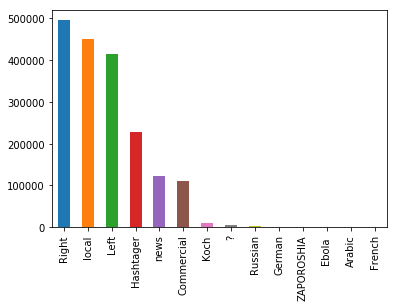

In [31]:
df['account_type'].value_counts().plot('bar')

In [32]:
#See the top tag of these tweets
sorted(tag_to_num.items(), key = lambda item: item[1], reverse=True)
#We can find that there're many tags related to politics

[('#news', 126871),
 ('#sports', 48042),
 ('#politics', 39519),
 ('#world', 27518),
 ('#local', 24789),
 ('#TopNews', 15135),
 ('#health', 11479),
 ('#BlackLivesMatter', 11418),
 ('#tcot', 11260),
 ('#business', 10832),
 ('#MAGA', 10139),
 ('#PJNET', 9337),
 ('#tech', 8221),
 ('#entertainment', 7511),
 ('#Cleveland', 6668),
 ('#crime', 6503),
 ('#TopVideo', 6452),
 ('#environment', 5777),
 ('#NowPlaying', 5228),
 ('#Trump', 4528),
 ('#breaking', 4508),
 ('#FAKENEWS', 4332),
 ('#SanJose', 4150),
 ('#2A', 4033),
 ('#WakeUpAmerica', 4032),
 ('#IslamKills', 3955),
 ('#life', 3924),
 ('#GOPDebate', 3864),
 ('#KochFarms', 3748),
 ('#DemnDebate', 3566),
 ('#Miami', 3440),
 ('#ToDoListBeforeChristmas', 3395),
 ('#ccot', 3392),
 ('#Chicago', 3289),
 ('#TCOT', 3072),
 ('#amb', 2895),
 ('#DemDebate', 2837),
 ('#ThingsYouCantIgnore', 2764),
 ('#ISIS', 2730),
 ('#Texas', 2621),
 ('#TrumpTrain', 2586),
 ('#p2', 2560),
 ('#IGetDepressedWhen', 2493),
 ('#IHatePokemonGoBecause', 2442),
 ('#SanDiego', 2

In [33]:
#How many unique accounts
df.author.nunique()

1264

In [34]:
#Maybe in later analysis we can filter those accounts without any followers bacuse they may not have much impact on citizens
df.groupby('author')['followers'].max().sort_values(ascending = False)

author
TEN_GOP            145244
KADIROVRUSSIA       92788
NOVOSTISPB          82213
JENN_ABRAMS         71022
PAMELA_MOORE13      70734
TODAYNYCITY         62088
ELEVEN_GOP          59100
CRYSTAL1JOHNSON     56725
WOKELUISA           55467
SOUTHLONESTAR       53782
COLDWAR20_RU        45088
USA_GUNSLINGER      43895
THEFOUNDINGSON      42000
BLACKNEWSOUTLET     40788
KANIJJACKSON        32372
WASHINGTONLINE      32191
PIGEONTODAY         30486
BLACKTOLIVE         29469
NEWORLEANSON        28785
MARGOSAVAZH         28054
WARFAREWW           26740
LUGANSKNOVOSTI      26358
KANSASDAILYNEWS     25871
DANAGEEZUS          24663
ANDYHASHTAGGER      23890
SANANTOTOPNEWS      22250
DALLASTOPNEWS       22205
TPARTYNEWS          22009
CHRIXMORGAN         21760
CHICAGODAILYNEW     21712
                    ...  
WHATSUPPPADAMS          0
DNT_SHOOT               0
CDAVISA20               0
CHAYKA_CHELSEY          0
VESTNIKPSKOV            0
CTHUNO                  0
KIRILLANDY              0
AMBBE

In [35]:
top_following = list(df.groupby('author')['followers'].max().sort_values(ascending = False)[:100].index)

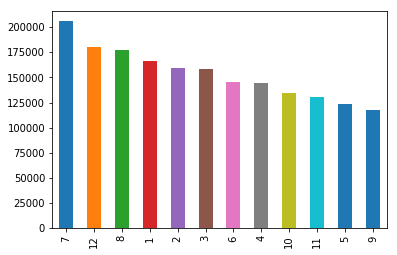

In [36]:
#Tweets trend in months
df.pb_month.value_counts().plot('bar')

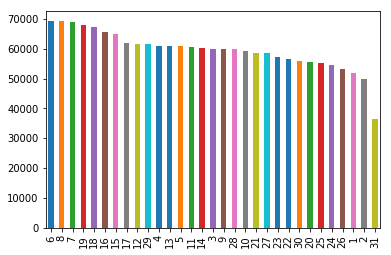

In [37]:
#Tweets trend in days
# These accounts tend to tweets during the middle of months
df.pb_date.value_counts().plot('bar')

In [38]:
df.post_type.value_counts()

RETWEET        792911
QUOTE_TWEET     27865
Name: post_type, dtype: int64

In [39]:
#About half of the handles follow more than 500 accounts
df.groupby('author')['following'].max().sort_values(ascending = False).loc[lambda x: x > 500].count()

535

### Wordcloud

In [40]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(' '.join(hash_tags))

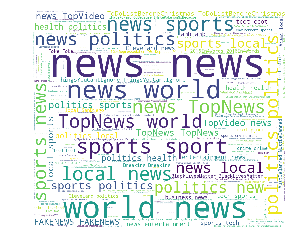

In [41]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [42]:
wordcloud.to_file('hash_tag_wordcloud.png')

#### content cloud, remove url/hashtag/@ 

In [44]:
content = list(df['content'])
content[918986] = ''

In [45]:
content_str = ' '.join(content)

In [63]:
import re
def remove_url(content):
    for i in range(len(content)):
        text = re.sub(r'https?:\/\/.*[\r\n]*', '', content[i], flags=re.MULTILINE)
        content[i] = text
    return content

In [83]:
def remove_hashtags(content):
    for i in range(len(content)):
        text = re.sub(r'#\w+', '', content[i], flags=re.MULTILINE)
        content[i] = text
    return content

In [102]:
def remove_at(content):
    for i in range(len(content)):
        text = re.sub(r'@\w+', '', content[i], flags=re.MULTILINE)
        content[i] = text
    return content

In [103]:
test_remove_at = ['Tell me about equality!   @deray ',
 "'@markaddisonjr @deray Is a kid at pool more dangerous than 150 armed thugs in federal building?  ",
 "'@markaddisonjr @deray is a 12 yo black kid with a toy gun more dangerous than 150 armed bigots?'",
 'Is this accurate?      ']
remove_at(test_remove_at) # test function

['Tell me about equality!    ',
 "'  Is a kid at pool more dangerous than 150 armed thugs in federal building?  ",
 "'  is a 12 yo black kid with a toy gun more dangerous than 150 armed bigots?'",
 'Is this accurate?      ']

In [85]:
remove_url(content[:3]) # test function

['#FoodPoisoning is not a joke! #Walmart #KochFarms ',
 'Thanks God that #turkey i ate few days ago was good. #KochFarms ',
 "I hurt easy, I just don't show it. You can hurt someone and not even know it."]

In [84]:
remove_hashtags(content[:3]) # test function

[' is not a joke!   ',
 'Thanks God that  i ate few days ago was good.  ',
 "I hurt easy, I just don't show it. You can hurt someone and not even know it."]

In [71]:
content = remove_url(content)

In [66]:
content

['#FoodPoisoning is not a joke! #Walmart #KochFarms ',
 'Thanks God that #turkey i ate few days ago was good. #KochFarms ',
 "I hurt easy, I just don't show it. You can hurt someone and not even know it.",
 "who's got the worst make up ever, don't tell me, mirror",
 'jade doesn`t love her! ',
 'Unreal friendship may turn to real. But real friendship, once ended, cannot be mended.',
 '« The young are permanently in a state resembling intoxication. » Aristotle',
 'The best thing you can do in your life is to please God. The worst thing you can do in your life is to please everyone.',
 "Honey, I'll learn! ",
 'cats giving high fives!!!!! ',
 'Home is where my bed is',
 'When the beat drops just keep swinging it',
 "She gets on you under your skin like a tattoo, she'll always be there, she holds on stuck in your head, like an old song. #JasonAldean",
 'As usual, there is a great woman behind every idiot',
 'Music plays a mind trick, watch me forget about missing you',
 'do u ever look at u

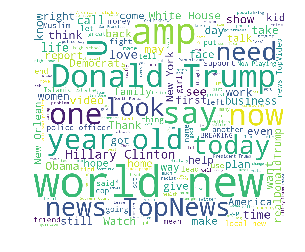

In [67]:
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(' '.join(content))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [68]:
wordcloud.to_file('content_wordcloud.png')

In [86]:
content = remove_hashtags(content)
content

[' is not a joke!   ',
 'Thanks God that  i ate few days ago was good.  ',
 "I hurt easy, I just don't show it. You can hurt someone and not even know it.",
 "who's got the worst make up ever, don't tell me, mirror",
 'jade doesn`t love her! ',
 'Unreal friendship may turn to real. But real friendship, once ended, cannot be mended.',
 '« The young are permanently in a state resembling intoxication. » Aristotle',
 'The best thing you can do in your life is to please God. The worst thing you can do in your life is to please everyone.',
 "Honey, I'll learn! ",
 'cats giving high fives!!!!! ',
 'Home is where my bed is',
 'When the beat drops just keep swinging it',
 "She gets on you under your skin like a tattoo, she'll always be there, she holds on stuck in your head, like an old song. ",
 'As usual, there is a great woman behind every idiot',
 'Music plays a mind trick, watch me forget about missing you',
 'do u ever look at ur friends like "im so glad these weird losers are mine"',
 'I

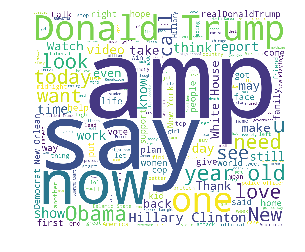

In [87]:
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(' '.join(content))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [89]:
wordcloud.to_file('content_without_hashtags.png')

In [104]:
content = remove_at(content)
content

[' is not a joke!   ',
 'Thanks God that  i ate few days ago was good.  ',
 "I hurt easy, I just don't show it. You can hurt someone and not even know it.",
 "who's got the worst make up ever, don't tell me, mirror",
 'jade doesn`t love her! ',
 'Unreal friendship may turn to real. But real friendship, once ended, cannot be mended.',
 '« The young are permanently in a state resembling intoxication. » Aristotle',
 'The best thing you can do in your life is to please God. The worst thing you can do in your life is to please everyone.',
 "Honey, I'll learn! ",
 'cats giving high fives!!!!! ',
 'Home is where my bed is',
 'When the beat drops just keep swinging it',
 "She gets on you under your skin like a tattoo, she'll always be there, she holds on stuck in your head, like an old song. ",
 'As usual, there is a great woman behind every idiot',
 'Music plays a mind trick, watch me forget about missing you',
 'do u ever look at ur friends like "im so glad these weird losers are mine"',
 'I

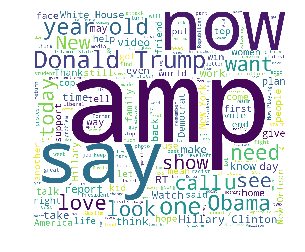

In [105]:
wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(' '.join(content))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file('content_without_hashtags_at.png')